
# Análisis de clientes Haulmer : EDA parte dos

Por : Christian Vergara Retamal - Benjamín Sánchez Aliste

Los siguientes archivos fueron proporcionados por las diversas áreas que interactuan directa e indirectamente con los clientes de Haulmer. El notebook funciona como anezxo de los archivos subidos anteriormente al repositoria de análisis de los datos 




# Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

# Preparación Ambiente de Trabajo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 75 

# Archivo **Reporte Comercios s/actividad** 

In [7]:
df_sinact = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Reporte_de_comercios_solo_ocupar_los_NO_.xlsx")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_sinact.columns

Index(['RUT', 'Nombre Legal', 'Nombre', 'Email', 'Nombre Plan',
       'Ha recibido pagos? (desde 2022-06-01)'],
      dtype='object')

In [10]:
print("Cantidad de registros : ",df_sinact.shape[0])
print("Cantidad de atributos : ",df_sinact.shape[1])

Cantidad de registros :  1190
Cantidad de atributos :  6


## Análisis exploratorio y preprocesamiento **Reporte Comercios**

In [11]:
df_sinact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   RUT                                    1190 non-null   object
 1   Nombre Legal                           1190 non-null   object
 2   Nombre                                 1190 non-null   object
 3   Email                                  1190 non-null   object
 4   Nombre Plan                            1190 non-null   object
 5   Ha recibido pagos? (desde 2022-06-01)  1190 non-null   object
dtypes: object(6)
memory usage: 55.9+ KB


In [12]:
df_sinact.describe()

,RUT,Nombre Legal,Nombre,Email,Nombre Plan,Ha recibido pagos? (desde 2022-06-01)
count,1190,1190,1190,1190,1190,1190
unique,1186,1189,1189,1155,7,1
top,11111111-1,GERSON ARCADIO PULIDO RINCON,GERSON ARCADIO PULIDO RINCON,pymesimple@gmail.com,Plan Tuu,NO
freq,3,2,2,10,914,1190


### Columna RUT

In [13]:
df_sinact.RUT.value_counts()

11111111-1    3
19469561-6    2
25600822-K    2
77169667-8    1
15756911-2    1
             ..
9045455-2     1
77066762-3    1
11576701-1    1
76049706-1    1
10546401-0    1
Name: RUT, Length: 1186, dtype: int64

In [14]:
from itertools import cycle
 
def validarRut(rut):
	rut = rut.upper();
	rut = rut.replace("-","")
	rut = rut.replace(".","")
	aux = rut[:-1]
	dv = rut[-1:]
 
	revertido = map(int, reversed(str(aux)))
	factors = cycle(range(2,8))
	s = sum(d * f for d, f in zip(revertido,factors))
	res = (-s)%11
 
	if str(res) == dv:
		return True
	elif dv=="K" and res==10:
		return True
	else:
		return False

In [15]:
df_sinact["aux_rut"] = df_sinact["RUT"].apply(lambda x : validarRut(x))

In [16]:
df_sinact.aux_rut.value_counts()

True     1189
False       1
Name: aux_rut, dtype: int64

In [17]:
df_sinact = df_sinact[df_sinact.aux_rut == True]

In [18]:
df_sinact.drop(columns = ["aux_rut"],inplace=True)

In [19]:
df_sinact.drop_duplicates(inplace = True)

In [20]:
df_sinact = df_sinact[df_sinact.RUT != "11111111-1"]

In [21]:
df_sinact[df_sinact['Email'].str.contains('haulmer')]

,RUT,Nombre Legal,Nombre,Email,Nombre Plan,Ha recibido pagos? (desde 2022-06-01)
2,19469561-6,Alex QA,Alex QA,rocio.gomez@haulmer.com,Plan Tuu,NO
6,19469561-6,compu Alex SA,compu Alex SA,alexander.zuniga@haulmer.com,Plan Tuu,NO
23,76144941-9,FENG S.A,FENG S.A,chiyinfeng@haulmer.com,Plan Tuu,NO
916,26802941-9,ROGER EDUARDO GARCIA REYES,ROGER EDUARDO GARCIA REYES,roger.garcia@haulmer.com,Plan Tuu,NO


In [22]:
values = ["19469561-6", "26802941-9"]
df_sinact = df_sinact[df_sinact.RUT.isin(values) == False]

In [23]:
df_sinact[df_sinact['Email'].str.contains('haulmer')]

,RUT,Nombre Legal,Nombre,Email,Nombre Plan,Ha recibido pagos? (desde 2022-06-01)
23,76144941-9,FENG S.A,FENG S.A,chiyinfeng@haulmer.com,Plan Tuu,NO


### Nombre Plan

In [24]:
df_sinact["Nombre Plan"].value_counts()

Plan Tuu                   907
Plan Tuu [Partner]         118
Simple                      95
Simple [Partner]            30
Plan Tuu+                   24
OpenRetail Microempresa      5
Plan Tuu+ [Partner]          4
Name: Nombre Plan, dtype: int64

In [25]:
df_sinact.drop(columns = ["Ha recibido pagos? (desde 2022-06-01)"], inplace = True)

In [26]:
df_sinact.sample(5)

,RUT,Nombre Legal,Nombre,Email,Nombre Plan
56,77347611-K,Willhayd S.P.A,Willhayd S.P.A,willhayd21@gmail.com,Plan Tuu
36,77404826-K,OPTICAS MALU SPA,OPTICAS MALU SPA,opticasmaluspa@gmail.com,Plan Tuu
83,76545117-5,Sociedad Almonacid Cisternas Limitada,Sociedad Almonacid Cisternas Limitada,sociedad.almonacid.cisternas@gmail.com,Plan Tuu
790,13283273-0,JAVIER ANDRES AVILES LIRA,Javier Aviles,vmariaflorencia61@gmail.com,Plan Tuu
1011,6574903-3,SERGIO DEL CARMEN MORAGA ABRIGO,SERGIO DEL CARMEN MORAGA ABRIGO,verduleriasergiomoraga@gmail.com,Plan Tuu [Partner]


In [27]:
categorical_cols = ['Nombre Plan']
lencoder = LabelEncoder()
for col in categorical_cols :
  df_sinact[col] = df_sinact[[col]].apply(lencoder.fit_transform)

In [28]:
df_sinact.sample(5)

,RUT,Nombre Legal,Nombre,Email,Nombre Plan
489,77168173-5,REPARAME.CL SPA,REPARAME.CL SPA,reparame.cl@gmail.com,1
231,76360271-0,OXILUZ PRODUCCIONES LIMITADA,OXILUZ PRODUCCIONES LIMITADA,contacto@oxiluz.cl,1
535,77449547-9,UNIFORMES CON ESTILO PUQ SPA,UNIFORMES CON ESTILO PUQ SPA,uniformesconestilopuq@gmail.com,1
208,13984729-6,GONZALO ANDRES SILVA ESTAY,GONZALO ANDRES SILVA ESTAY,jennymarsi.5@gmail.com,1
443,14631905-K,ALBERTO LUIS RODRIGUEZ,ALBERTO LUIS RODRIGUEZ,alrm56@tie.cl,1


----

# Archivo **Certificaciones**

In [29]:
df_certificaciones = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Certificaciones.xlsx")

In [30]:
df_certificaciones.columns

Index(['Clave', 'Resumen', 'Responsable', 'Estado', 'Creada', 'Actualizada',
       'RUT Empresa'],
      dtype='object')

In [31]:
print("Cantidad de registros : ",df_certificaciones.shape[0])
print("Cantidad de atributos : ",df_certificaciones.shape[1])

Cantidad de registros :  33815
Cantidad de atributos :  7


## Análisis exploratorio y preprocesamiento **Certificaciones**

In [32]:
df_certificaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33815 entries, 0 to 33814
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Clave        33815 non-null  object        
 1   Resumen      33815 non-null  object        
 2   Responsable  3303 non-null   object        
 3   Estado       33815 non-null  object        
 4   Creada       33815 non-null  datetime64[ns]
 5   Actualizada  33815 non-null  datetime64[ns]
 6   RUT Empresa  27102 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 1.8+ MB


In [33]:
df_certificaciones.describe()

,Clave,Resumen,Responsable,Estado,Creada,Actualizada,RUT Empresa
count,33815,33815,3303,33815,33815,33815,27102
unique,33815,33283,18,36,33656,26580,14661
top,CO-34266,: Certificación DTE: LIVEHOST SPA,Jorge Calquín,Finalizada,2022-06-07 05:49:51,2020-12-30 14:15:25,76353391-3
freq,1,47,1073,16383,3,16,89
first,NaN,NaN,NaN,NaN,2018-03-15 06:15:49,2020-12-30 14:02:17,NaN
last,NaN,NaN,NaN,NaN,2022-06-13 10:48:17,2022-06-13 11:35:19,NaN


In [34]:
df_certificaciones.describe(include="object")

,Clave,Resumen,Responsable,Estado,RUT Empresa
count,33815,33815,3303,33815,27102
unique,33815,33283,18,36,14661
top,CO-34266,: Certificación DTE: LIVEHOST SPA,Jorge Calquín,Finalizada,76353391-3
freq,1,47,1073,16383,89


In [35]:
df_certificaciones.sample(3)

,Clave,Resumen,Responsable,Estado,Creada,Actualizada,RUT Empresa
9173,CO-25089,PROD_WEB: Certificación Boleta: EMPRESAS V&E T...,NaN,Finalizada,2021-05-11 23:34:34,2021-05-19 13:37:28,77266146-0
13997,CO-20262,PROD_WEB: Certificación Boleta: RODRIGO ANTONI...,NaN,Finalizada,2021-02-26 07:00:39,2021-03-11 13:53:22,9908379-4
9734,CO-24527,PROD_WEB: Certificación Inicial: JUAN PABLO ME...,NaN,Terminado,2021-04-22 12:21:15,2021-05-02 14:32:31,7002774-7


----

# Archivo **Consolidados Pagos TUU**

In [36]:
df_consolidados = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Consolidado TUU Pagos 2022.xlsx")

In [37]:
print("Cantidad de registros : ",df_consolidados.shape[0])
print("Cantidad de atributos : ",df_consolidados.shape[1])

Cantidad de registros :  17319
Cantidad de atributos :  28


## Análisis exploratorio y preprocesamiento **Consolidados Pagos TUU**

In [38]:
df_consolidados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RUT                      17319 non-null  object        
 1   Razón social             17319 non-null  object        
 2   Código de comercio       17319 non-null  int64         
 3   Código SII               17319 non-null  float64       
 4   Porcentaje comision      17319 non-null  float64       
 5   Comision fija            17319 non-null  float64       
 6   Cantidad TXs             17319 non-null  float64       
 7   Monto Total              17319 non-null  float64       
 8   Comision Neta            17319 non-null  float64       
 9   Comision IVA             17319 non-null  float64       
 10  Tipo                     17319 non-null  object        
 11  Período                  17319 non-null  datetime64[ns]
 12  Porcentaje comision 2    17319 n

In [39]:
df_consolidados.describe()

,Código de comercio,Código SII,Porcentaje comision,Comision fija,Cantidad TXs,Monto Total,Comision Neta,Comision IVA,Porcentaje comision 2,MDR Abril Débito,...,Costo tx Abril,Margen tx Abril,MDR Mayo REAL,MDR Mayo Supuesto,Costo tx Mayo REAL,Margen tx Mayo REAL,Costo tx Mayo Supuesto,Margen tx Mayo Supuesto,Tarifa Partner,Margen Partner
count,1.731900e+04,17319.000000,17319.000000,17319.0,17319.000000,1.731900e+04,17319.000000,17319.000000,17319.000000,17319.000000,...,17319.000000,17319.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,17319.000000,17319.000000,17319.000000
mean,5.970395e+11,500666.757838,1.657170,0.0,126.724291,1.433976e+06,19524.408684,3710.670131,0.016572,0.012083,...,18793.937244,730.471440,0.014151,0.014151,18654.139746,2725.815116,18654.139746,2332.658111,0.016424,228.403173
std,4.086982e+05,184546.689871,0.553607,0.0,282.112957,3.051467e+06,40812.801621,7755.479639,0.005536,0.001071,...,39133.343188,6978.346002,0.004417,0.004417,37143.484334,8867.337013,37143.484334,8258.634385,0.005470,3994.321917
min,5.970392e+11,11306.000000,0.000000,0.0,1.000000,1.000000e+02,0.000000,0.000000,0.000000,0.005600,...,0.560000,-247634.662500,0.005100,0.005100,0.900000,-207830.951100,0.900000,-207830.951100,0.001300,-123458.715000
25%,5.970393e+11,472101.000000,1.290000,0.0,4.000000,6.799500e+04,1217.000000,231.000000,0.012900,0.011700,...,1161.020000,0.913000,0.010700,0.010700,1488.081000,128.000000,1488.081000,16.580000,0.012900,0.000000
50%,5.970393e+11,474100.000000,1.290000,0.0,22.000000,3.540000e+05,5442.000000,1035.000000,0.012900,0.012000,...,5227.250000,120.100000,0.011300,0.011300,5894.200000,718.391000,5894.200000,447.800000,0.012900,0.000000
75%,5.970393e+11,561000.000000,2.250000,0.0,113.000000,1.426310e+06,19964.000000,3800.000000,0.022500,0.012700,...,19182.884500,781.000000,0.019300,0.019300,19732.812100,2852.834000,19732.812100,2263.141000,0.022500,0.000000
max,5.970406e+11,960909.000000,2.900000,0.0,5221.000000,6.179230e+07,797164.000000,151416.000000,0.029000,0.025000,...,722969.874900,154081.256000,0.035000,0.035000,698252.956100,211239.085000,698252.956100,211239.085000,0.025100,151592.503000


In [40]:
df_consolidados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RUT                      17319 non-null  object        
 1   Razón social             17319 non-null  object        
 2   Código de comercio       17319 non-null  int64         
 3   Código SII               17319 non-null  float64       
 4   Porcentaje comision      17319 non-null  float64       
 5   Comision fija            17319 non-null  float64       
 6   Cantidad TXs             17319 non-null  float64       
 7   Monto Total              17319 non-null  float64       
 8   Comision Neta            17319 non-null  float64       
 9   Comision IVA             17319 non-null  float64       
 10  Tipo                     17319 non-null  object        
 11  Período                  17319 non-null  datetime64[ns]
 12  Porcentaje comision 2    17319 n

In [41]:
df_consolidados.describe()

,Código de comercio,Código SII,Porcentaje comision,Comision fija,Cantidad TXs,Monto Total,Comision Neta,Comision IVA,Porcentaje comision 2,MDR Abril Débito,...,Costo tx Abril,Margen tx Abril,MDR Mayo REAL,MDR Mayo Supuesto,Costo tx Mayo REAL,Margen tx Mayo REAL,Costo tx Mayo Supuesto,Margen tx Mayo Supuesto,Tarifa Partner,Margen Partner
count,1.731900e+04,17319.000000,17319.000000,17319.0,17319.000000,1.731900e+04,17319.000000,17319.000000,17319.000000,17319.000000,...,17319.000000,17319.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,17319.000000,17319.000000,17319.000000
mean,5.970395e+11,500666.757838,1.657170,0.0,126.724291,1.433976e+06,19524.408684,3710.670131,0.016572,0.012083,...,18793.937244,730.471440,0.014151,0.014151,18654.139746,2725.815116,18654.139746,2332.658111,0.016424,228.403173
std,4.086982e+05,184546.689871,0.553607,0.0,282.112957,3.051467e+06,40812.801621,7755.479639,0.005536,0.001071,...,39133.343188,6978.346002,0.004417,0.004417,37143.484334,8867.337013,37143.484334,8258.634385,0.005470,3994.321917
min,5.970392e+11,11306.000000,0.000000,0.0,1.000000,1.000000e+02,0.000000,0.000000,0.000000,0.005600,...,0.560000,-247634.662500,0.005100,0.005100,0.900000,-207830.951100,0.900000,-207830.951100,0.001300,-123458.715000
25%,5.970393e+11,472101.000000,1.290000,0.0,4.000000,6.799500e+04,1217.000000,231.000000,0.012900,0.011700,...,1161.020000,0.913000,0.010700,0.010700,1488.081000,128.000000,1488.081000,16.580000,0.012900,0.000000
50%,5.970393e+11,474100.000000,1.290000,0.0,22.000000,3.540000e+05,5442.000000,1035.000000,0.012900,0.012000,...,5227.250000,120.100000,0.011300,0.011300,5894.200000,718.391000,5894.200000,447.800000,0.012900,0.000000
75%,5.970393e+11,561000.000000,2.250000,0.0,113.000000,1.426310e+06,19964.000000,3800.000000,0.022500,0.012700,...,19182.884500,781.000000,0.019300,0.019300,19732.812100,2852.834000,19732.812100,2263.141000,0.022500,0.000000
max,5.970406e+11,960909.000000,2.900000,0.0,5221.000000,6.179230e+07,797164.000000,151416.000000,0.029000,0.025000,...,722969.874900,154081.256000,0.035000,0.035000,698252.956100,211239.085000,698252.956100,211239.085000,0.025100,151592.503000


In [42]:
df_consolidados.describe(include = "object")

,RUT,Razón social,Tipo,MCC,Partner,Categoría Partner
count,17319,17319,17319,16900,17319,17309
unique,2955,3017,2,86,31,5
top,74828100-2,FUND JARDIN BOTANICO NACIONAL DE VINA DEL MAR,DEBITO,SUPERMERCADOS,No Partner,No Partner
freq,60,60,10178,3334,15568,15568


In [43]:
df_consolidados["aux_rut"] = df_consolidados["RUT"].apply(lambda x : validarRut(x))

In [44]:
df_consolidados["aux_rut"].value_counts()

True    17319
Name: aux_rut, dtype: int64

In [45]:
df_consolidados["RUT"].value_counts()

74828100-2    60
76795561-8    46
76544003-3    39
76938573-8    38
78067040-1    38
              ..
76513949-K     1
76510731-8     1
76505877-5     1
10134744-3     1
77525046-1     1
Name: RUT, Length: 2955, dtype: int64

In [46]:
df_consolidados.RUT.nunique()

2955

In [47]:
df_consolidados.Período.value_counts()

2022-05-01    4897
2022-04-01    4079
2022-03-01    3366
2022-02-01    2731
2022-01-01    2246
Name: Período, dtype: int64

In [48]:
df_consolidados.columns

Index(['RUT', 'Razón social', 'Código de comercio', 'Código SII',
       'Porcentaje comision', 'Comision fija', 'Cantidad TXs', 'Monto Total',
       'Comision Neta', 'Comision IVA', 'Tipo', 'Período',
       'Porcentaje comision 2', 'MDR Abril Débito', 'MDR Abril Crédito',
       'Costo tx Abril', 'Margen tx Abril', 'MDR Mayo REAL',
       'MDR Mayo Supuesto', 'Costo tx Mayo REAL', 'Margen tx Mayo REAL',
       'Costo tx Mayo Supuesto', 'Margen tx Mayo Supuesto', 'MCC', 'Partner',
       'Categoría Partner', 'Tarifa Partner', 'Margen Partner', 'aux_rut'],
      dtype='object')

In [49]:
df_consolidados_aux = df_consolidados.copy()
df_consolidados_aux.drop(columns = ["Código de comercio", "Período", "Porcentaje comision 2", 'MDR Abril Débito', 'MDR Abril Crédito',
       'Costo tx Abril', 'Margen tx Abril', 'MDR Mayo REAL',
       'MDR Mayo Supuesto', 'Costo tx Mayo REAL', 'Margen tx Mayo REAL',
       'Costo tx Mayo Supuesto', 'Margen tx Mayo Supuesto', "Tarifa Partner", "Margen Partner", "aux_rut"], inplace = True)

In [50]:
df_consolidados_aux.sample(2)

,RUT,Razón social,Código SII,Porcentaje comision,Comision fija,Cantidad TXs,Monto Total,Comision Neta,Comision IVA,Tipo,MCC,Partner,Categoría Partner
6684,77497596-9,LUXOR SPA,472200.0,1.29,0.0,836.0,4557770.0,58801.0,11179.0,DEBITO,"BOTILLERIAS,VINAS",No Partner,No Partner
15844,77338537-8,MULTISERVICIOS ALARCÓN CONTRERAS COLONIAL SPA,802000.0,1.29,0.0,558.0,2095520.0,27012.0,5160.0,DEBITO,OTROS CONTRATISTAS ESPECIALIZADOS,No Partner,No Partner


In [51]:
df_consolidados_aux.rename(columns = {"Razón social":"razonSocial", "Código SII":"codSII", "Porcentaje comision":"porcentajeComision", "Comision fija":"comisionFija",
                                  "Cantidad TXs":"cantidadTransacciones", "Monto Total":"montoTotal", "Comision Neta":"comisionNeta",
                                  "Comision IVA":"comisionIVA", "Categoría Partner":"categoriaPartner"}, inplace = True)

In [52]:
df_consolidados_aux.sample(2)

,RUT,razonSocial,codSII,porcentajeComision,comisionFija,cantidadTransacciones,montoTotal,comisionNeta,comisionIVA,Tipo,MCC,Partner,categoriaPartner
9053,76544003-3,SUPERMERCADO MARIO ISRAEL RAMOS MANZANO,561000.0,2.25,0.0,4.0,133800.0,3011.0,572.0,CREDITO,RESTAURANT FAST FOOD,No Partner,No Partner
1000,77338350-2,SOC HOTELERA Y AGROTURISTICA PINGUIN LAND LIMI...,501100.0,1.16,0.0,306.0,8668100.0,100566.0,19068.0,DEBITO,NaN,No Partner,No Partner


In [53]:
df_consolidados_aux.shape

(17319, 13)

In [54]:
df_consolidados_aux.codSII.value_counts()

472101.0    3105
561000.0    1971
107100.0     632
472109.0     370
960200.0     370
            ... 
476102.0       1
949909.0       1
12900.0        1
742001.0       1
370000.0       1
Name: codSII, Length: 249, dtype: int64

In [55]:
def getfreqcred(rut):
  df_rut = df_consolidados_aux[df_consolidados_aux["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "CREDITO"].shape[0]

In [56]:
def getfreqdeb(rut):
  df_rut = df_consolidados_aux[df_consolidados_aux["RUT"] == rut]
  return df_rut[df_rut["Tipo"] == "DEBITO"].shape[0]

In [57]:
df_montoTotal = df_consolidados_aux.groupby(['RUT'])['montoTotal'].sum().to_frame().reset_index()
df_cantTxs = df_consolidados_aux.groupby(['RUT'])['cantidadTransacciones'].sum().to_frame().reset_index()
df_neta = df_consolidados_aux.groupby(['RUT'])['comisionNeta'].sum().to_frame().reset_index()
df_iva = df_consolidados_aux.groupby(['RUT'])['comisionIVA'].sum().to_frame().reset_index()
df_porcentajeComision = df_consolidados_aux.groupby(['RUT'])["porcentajeComision"].mean().to_frame()

In [58]:
categorical_cols = ["codSII", 'MCC', 'Partner', 'categoriaPartner']
lencoder = LabelEncoder()
for col in categorical_cols :
  df_consolidados_aux[col] = df_consolidados_aux[[col]].apply(lencoder.fit_transform)

In [59]:
df_consolidados_aux.drop(columns = ["montoTotal", "cantidadTransacciones", "comisionNeta", "comisionIVA", "porcentajeComision", "comisionFija", "razonSocial"], inplace = True)

In [60]:
df_consolidados_aux

,RUT,codSII,Tipo,MCC,Partner,categoriaPartner
0,10018933-K,23,DEBITO,48,0,3
1,10037348-3,116,DEBITO,11,0,3
2,10037348-3,116,DEBITO,11,0,3
3,10049357-8,107,DEBITO,74,0,3
4,10054812-7,173,DEBITO,66,24,2
...,...,...,...,...,...,...
17314,9985572-K,18,DEBITO,57,28,4
17315,9985572-K,18,DEBITO,57,28,4
17316,9988020-1,18,DEBITO,57,0,3
17317,9999023-6,112,CREDITO,48,0,3


In [61]:
df_consolidados_aux["debito"] = df_consolidados_aux["RUT"].apply(lambda x : getfreqdeb(x))
df_consolidados_aux["credito"] = df_consolidados_aux["RUT"].apply(lambda x : getfreqcred(x))

In [62]:
df_consolidados_aux.drop(columns = ["Tipo"], inplace = True)

In [63]:
df_debito = df_consolidados_aux.groupby(['RUT'])["debito"].mean().to_frame()
df_credito = df_consolidados_aux.groupby(['RUT'])["credito"].mean().to_frame()

In [64]:
df_aux = df_consolidados_aux.copy()
df_aux.drop_duplicates(inplace = True)

In [65]:
df_aux

,RUT,codSII,MCC,Partner,categoriaPartner,debito,credito
0,10018933-K,23,48,0,3,5,4
1,10037348-3,116,11,0,3,8,6
3,10049357-8,107,74,0,3,5,5
4,10054812-7,173,66,24,2,3,0
5,10056607-9,110,74,0,3,5,4
...,...,...,...,...,...,...,...
17287,9751797-5,110,74,17,2,1,0
17294,9789513-9,114,57,0,3,1,0
17302,9836941-4,110,74,0,3,1,0
17305,9846371-2,111,13,29,4,1,1


*Se opta por eliminar los rut duplicados para la primera iteración, posteriormente se espera buscar una forma de tratar aquellos comercios que contengan más de un MCC / código servicio impuestos internos*

In [66]:
df_aux.drop_duplicates(subset = "RUT", keep="first", inplace = True)

In [67]:
df_aux

,RUT,codSII,MCC,Partner,categoriaPartner,debito,credito
0,10018933-K,23,48,0,3,5,4
1,10037348-3,116,11,0,3,8,6
3,10049357-8,107,74,0,3,5,5
4,10054812-7,173,66,24,2,3,0
5,10056607-9,110,74,0,3,5,4
...,...,...,...,...,...,...,...
17287,9751797-5,110,74,17,2,1,0
17294,9789513-9,114,57,0,3,1,0
17302,9836941-4,110,74,0,3,1,0
17305,9846371-2,111,13,29,4,1,1


In [68]:
data_frames = [df_montoTotal, df_cantTxs, df_neta, df_iva, df_porcentajeComision, df_debito, df_credito, df_aux]

In [69]:
from functools import reduce
df_consolidados_merge = reduce(lambda  left,right: pd.merge(left,right,on=['RUT']), data_frames)

In [70]:
df_consolidados_merge['montoTotal'] = df_consolidados_merge['montoTotal'].astype(int)
df_consolidados_merge['cantidadTransacciones'] = df_consolidados_merge['cantidadTransacciones'].astype(int)
df_consolidados_merge['comisionNeta'] = df_consolidados_merge['comisionNeta'].astype(int)
df_consolidados_merge['comisionIVA'] = df_consolidados_merge['comisionIVA'].astype(int)

In [71]:
df_consolidados_merge.sample(3)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,debito_x,credito_x,codSII,MCC,Partner,categoriaPartner,debito_y,credito_y
2422,77494039-1,12139549,149,180799,34352,1.81,4.0,4.0,82,45,0,3,4,4
1337,76602251-0,38716000,3655,567264,107527,1.87,4.0,4.0,173,66,27,1,4,4
682,17117958-0,100,1,1,0,1.29,1.0,0.0,110,74,0,3,1,0


In [72]:
df_consolidados_merge["porcentajeComision"] = df_consolidados_merge["porcentajeComision"].round(decimals = 2)

In [73]:
df_consolidados_merge

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,debito_x,credito_x,codSII,MCC,Partner,categoriaPartner,debito_y,credito_y
0,10006728-5,209000,8,2697,513,1.29,1.0,0.0,142,3,0,3,1,0
1,10007508-3,300,2,4,1,1.29,1.0,0.0,111,13,0,3,1,0
2,10011781-9,8410468,387,118884,22577,1.88,4.0,3.0,111,13,11,4,4,3
3,10018933-K,4526000,178,55777,10587,1.63,5.0,4.0,23,48,0,3,5,4
4,10024696-1,927100,89,13335,2536,1.90,2.0,2.0,109,86,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,9974219-4,11297545,1194,141104,26821,1.69,3.0,3.0,154,48,0,3,3,3
2951,9979750-9,1270180,515,13431,2583,1.50,5.0,5.0,114,57,0,3,5,5
2952,9985572-K,891200,124,10065,1916,1.13,2.0,0.0,18,57,28,4,2,0
2953,9988020-1,27783870,840,319914,60777,1.45,5.0,4.0,18,57,0,3,5,4


In [74]:
df_consolidados_merge.drop(columns = ["debito_x", "credito_x"], inplace=True)

In [75]:
df_consolidados_merge.rename(columns = {"credito_y":"credito", "debito_y":"debito"}, inplace = True)

In [76]:
df_consolidados_merge

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito
0,10006728-5,209000,8,2697,513,1.29,142,3,0,3,1,0
1,10007508-3,300,2,4,1,1.29,111,13,0,3,1,0
2,10011781-9,8410468,387,118884,22577,1.88,111,13,11,4,4,3
3,10018933-K,4526000,178,55777,10587,1.63,23,48,0,3,5,4
4,10024696-1,927100,89,13335,2536,1.90,109,86,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,9974219-4,11297545,1194,141104,26821,1.69,154,48,0,3,3,3
2951,9979750-9,1270180,515,13431,2583,1.50,114,57,0,3,5,5
2952,9985572-K,891200,124,10065,1916,1.13,18,57,28,4,2,0
2953,9988020-1,27783870,840,319914,60777,1.45,18,57,0,3,5,4


In [77]:
df_consolidados_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2955 entries, 0 to 2954
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RUT                    2955 non-null   object 
 1   montoTotal             2955 non-null   int64  
 2   cantidadTransacciones  2955 non-null   int64  
 3   comisionNeta           2955 non-null   int64  
 4   comisionIVA            2955 non-null   int64  
 5   porcentajeComision     2955 non-null   float64
 6   codSII                 2955 non-null   int64  
 7   MCC                    2955 non-null   int64  
 8   Partner                2955 non-null   int64  
 9   categoriaPartner       2955 non-null   int64  
 10  debito                 2955 non-null   int64  
 11  credito                2955 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 300.1+ KB


In [78]:
df_consolidados_merge.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito
count,2.955000e+03,2955.000000,2.955000e+03,2.955000e+03,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000
mean,8.404412e+06,742.720135,1.144309e+05,2.174792e+04,1.604660,128.821997,51.572927,1.822335,2.987817,3.444332,2.416582
std,2.001466e+07,1637.164655,2.815907e+05,5.351479e+04,0.287927,53.455910,24.476503,5.991806,0.516997,2.312545,2.355376
min,1.000000e+02,1.000000,0.000000e+00,0.000000e+00,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.504975e+05,31.000000,5.856500e+03,1.113500e+03,1.390000,110.000000,36.000000,0.000000,3.000000,2.000000,1.000000
50%,2.410650e+06,187.000000,3.181000e+04,6.044000e+03,1.680000,116.000000,57.000000,0.000000,3.000000,3.000000,2.000000
75%,7.889906e+06,725.000000,1.064580e+05,2.021850e+04,1.800000,173.000000,74.000000,0.000000,3.000000,5.000000,4.000000
max,3.653484e+08,24262.000000,5.802891e+06,1.102355e+06,2.900000,248.000000,86.000000,30.000000,5.000000,30.000000,30.000000


In [79]:
#df_consolidados_merge.to_csv("output.csv")

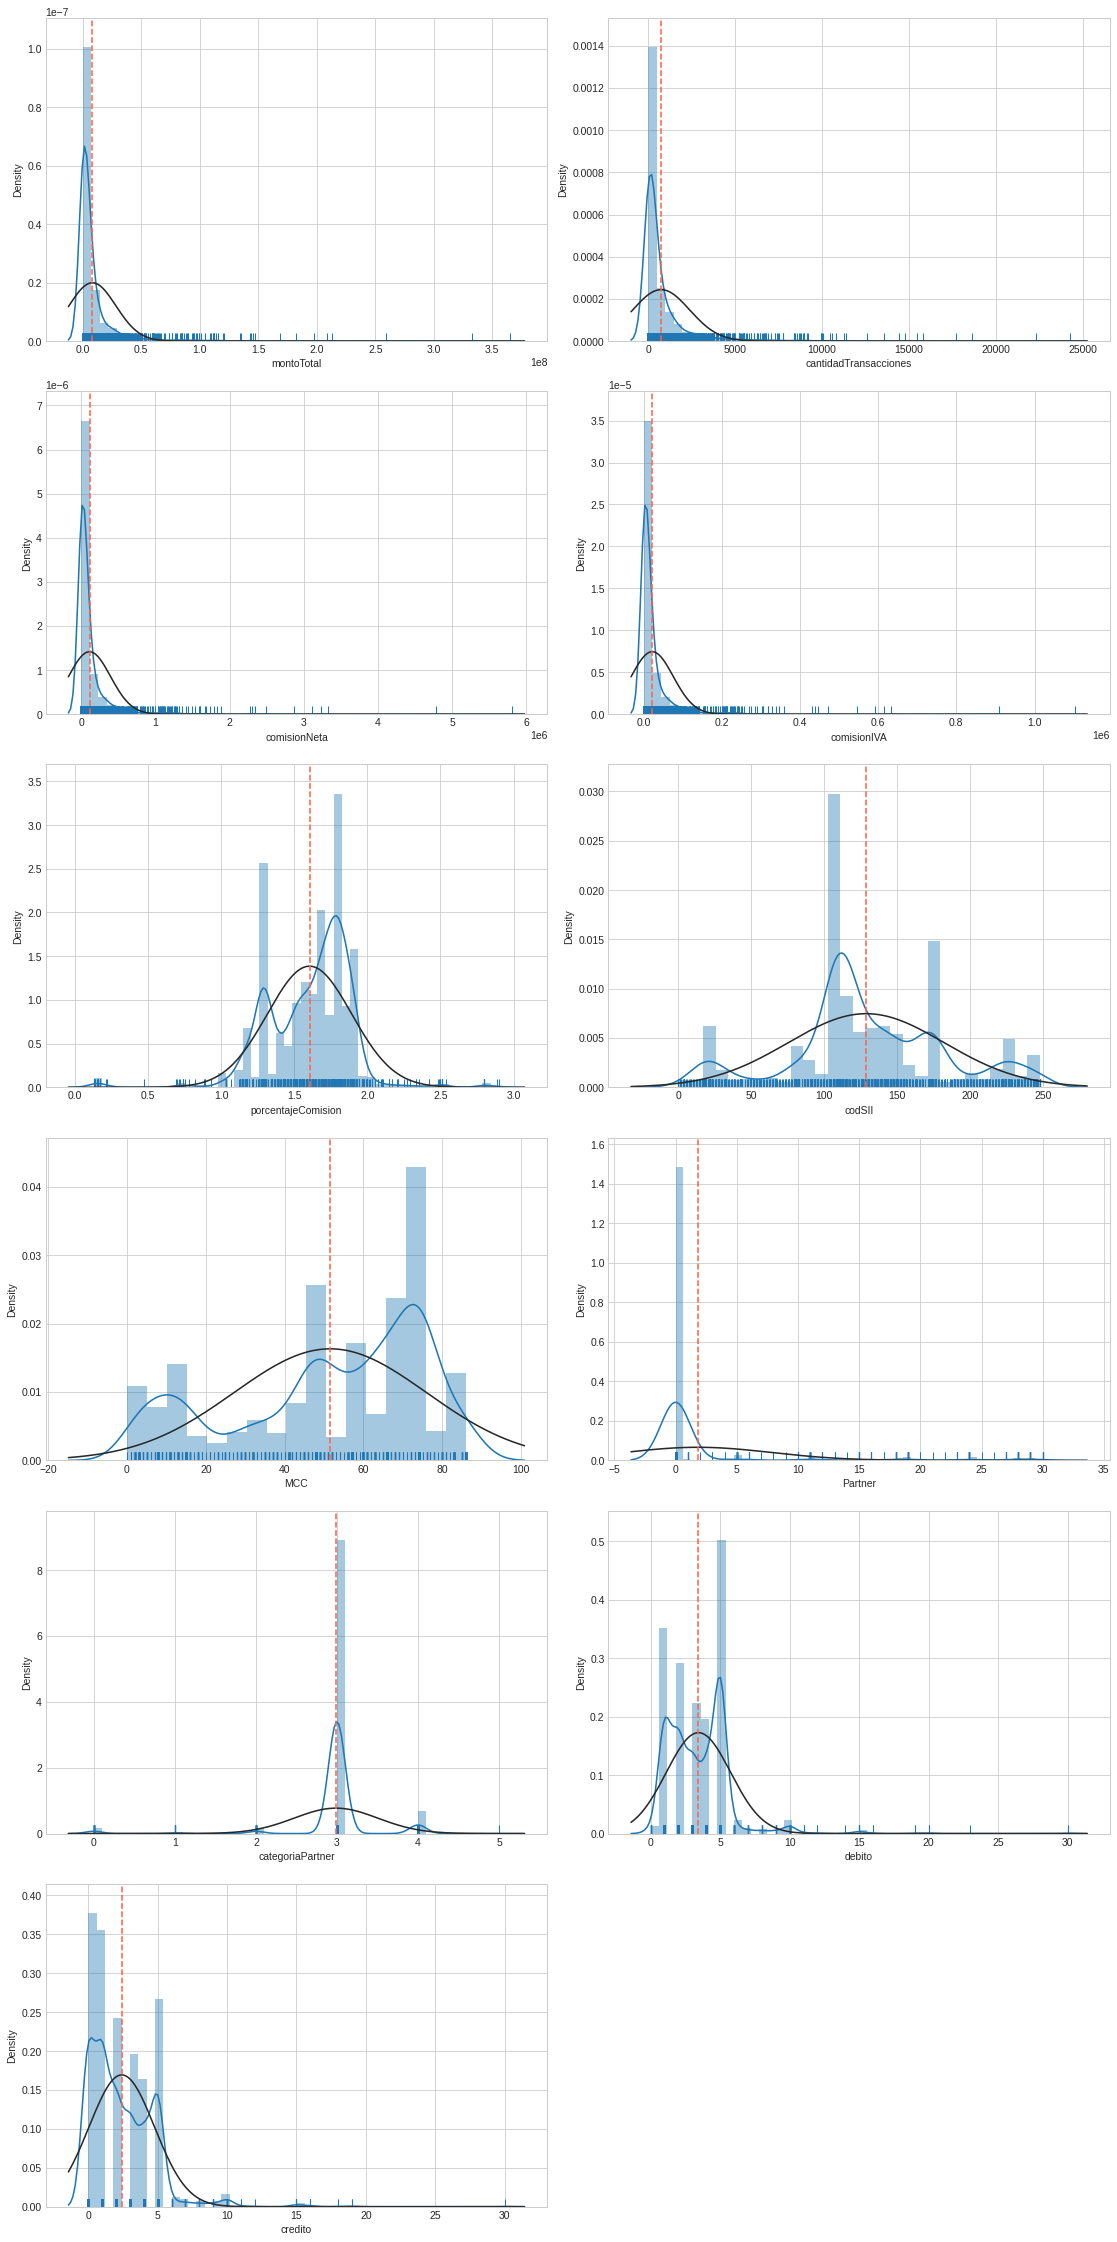

In [80]:
# Visualización de todas las variables sin las variables categóricas con mas de 10 valores únicos
rows = 6; cols = round(df_consolidados_merge.drop(columns = "RUT").shape[1]/rows)
plt.figure(figsize=(15,30))
for i,j in enumerate(df_consolidados_merge.drop(columns = "RUT").columns):
    plt.subplot(rows, cols, i+1)
    if df_consolidados_merge[j].dtype == 'object':
        sns.countplot(df_consolidados_merge[j])
        plt.xticks(rotation=45)
    else:
        if len(df_consolidados_merge[j].value_counts())>2:
            sns.distplot(df_consolidados_merge[j],rug=True,fit=stats.norm)    
            plt.axvline(df_consolidados_merge[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(df_consolidados_merge[j])
    plt.tight_layout()

----

# Archivo **Facturación y pagos clientes TUU**

In [81]:
df_facturacion_sheetcl = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Facturación y pagos clientes TUU.xlsx", "Cliente Tuu")

In [82]:
df_facturacion_sheetcl.columns

Index(['Rut', 'Rut dv', 'Rut sdv', 'Email', 'Whmcs', 'Workspace', 'Plan',
       'Organizacion', 'Facturación', 'Pagos', 'F2', 'P2'],
      dtype='object')

In [83]:
print("Cantidad de registros : ",df_facturacion_sheetcl.shape[0])
print("Cantidad de atributos : ",df_facturacion_sheetcl.shape[1])

Cantidad de registros :  4010
Cantidad de atributos :  12


In [84]:
df_facturacion_sheetpag = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Pagos.xlsx")

In [85]:
print("Cantidad de registros : ",df_facturacion_sheetpag.shape[0])
print("Cantidad de atributos : ",df_facturacion_sheetpag.shape[1])

Cantidad de registros :  17539
Cantidad de atributos :  5


## Análisis exploratorio y preprocesamiento **Facturación y pagos clientes TUU**

In [86]:
df_facturacion_sheetcl.sample(3)

,Rut,Rut dv,Rut sdv,Email,Whmcs,Workspace,Plan,Organizacion,Facturación,Pagos,F2,P2
2189,768108935,76810893-5,76810893,mariapaz@plazapichilemu.cl,94787.0,16204.0,Plan Tuu,Plaza Pichilemu Spa,NaN,Realiza Pagos,b. 0.1MM,a. 0MM
1310,159077764,15907776-4,15907776,pabarza.01@gmail.com,95303.0,16317.0,Plan Tuu,Almacén,NaN,Realiza Pagos,e. 10MM,e. 10MM
2610,772028571,77202857-1,77202857,maguilar.cl@gmail.com,35552.0,11718.0,Plan Tuu,Sociedad Comercial And Brt Spa,NaN,NaN,a. 0MM,a. 0MM


In [87]:
df_facturacion_sheetcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rut           4010 non-null   object 
 1   Rut dv        4010 non-null   object 
 2   Rut sdv       4010 non-null   int64  
 3   Email         4010 non-null   object 
 4   Whmcs         4010 non-null   float64
 5   Workspace     4010 non-null   float64
 6   Plan          4010 non-null   object 
 7   Organizacion  4010 non-null   object 
 8   Facturación   0 non-null      float64
 9   Pagos         2832 non-null   object 
 10  F2            4010 non-null   object 
 11  P2            4010 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 376.1+ KB


In [88]:
df_facturacion_sheetpag.sample(3)

,RUT,Tipo,Periodo,CantidadTXs,MontoTotal
15299,76984281-0,Crédito,2022-05-01,21.0,256897.0
6207,77388446-3,Crédito,2022-03-01,8.0,191510.0
11834,77377377-7,Débito,2022-04-01,134.0,2195460.0


In [89]:
df_facturacion_sheetpag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17539 entries, 0 to 17538
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RUT          17539 non-null  object        
 1   Tipo         17539 non-null  object        
 2   Periodo      17539 non-null  datetime64[ns]
 3   CantidadTXs  17539 non-null  float64       
 4   MontoTotal   17539 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 685.2+ KB


----

# Archivo **Incidencias**

In [90]:
df_incidencias = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Incidencias Christian RPA- HES.xlsx", "IncidenciasHES")

In [91]:
df_incidencias.columns

Index(['Clave', 'Resumen', 'Responsable', 'Informador', 'Estado', 'Creada',
       'Actualizada', 'Cuenta correo origen (Envía)',
       'Cuentas de Email con Problemas', 'Descripción', 'DTE con Problemas',
       'Email asociado a la compra', 'Email Cliente', 'ID Dispositivo',
       'Nombre Cliente', 'RUT asociado a la firma', 'RUT Empresa', 'Telefono',
       'Periodo'],
      dtype='object')

In [92]:
print("Cantidad de registros : ",df_incidencias.shape[0])
print("Cantidad de atributos : ",df_incidencias.shape[1])

Cantidad de registros :  12471
Cantidad de atributos :  19


## Análisis exploratorio y preprocesamiento **Incidencias**

In [93]:
df_incidencias.sample(3)

,Clave,Resumen,Responsable,Informador,Estado,Creada,Actualizada,Cuenta correo origen (Envía),Cuentas de Email con Problemas,Descripción,DTE con Problemas,Email asociado a la compra,Email Cliente,ID Dispositivo,Nombre Cliente,RUT asociado a la firma,RUT Empresa,Telefono,Periodo
8697,HES-3834,[chip] solotienechip,Diego Palma,Rodrigo Sebastian,Finalizada,2021-06-03 15:23:02,2021-06-11 13:10:00,NaN,NaN,"!IMG-20210603-WA0008.jpg|width=720,height=1280...",NaN,fpinopalma@gmail.com,fpinopalma@gmail.com,nopos,caren,NaN,nocliente,961252519,2021-06-01
1559,HES-11002,[ChileFirmas] 703897-6,Pedro Saavedra,Leandro Jesus Colmenarez,Cerrada,2022-03-30 18:17:18,2022-04-26 09:44:07,NaN,NaN,Cliente genero firma de manera exitosa pero al...,NaN,NaN,joelparedesm@gmail.com,NaN,Pablo Segundo Aguilera Parotto,703897-6,NaN,+569 7849 2640,2022-03-01
11643,HES-886,[Haulmer OPEN] 13064781-2,Diego Palma,Adolfo Fierro,Finalizada,2021-02-04 16:41:49,2021-02-04 18:44:56,NaN,NaN,Cliente completo el setup Notificación Setup ...,NaN,NaN,msalinas@sybcom.cl,NaN,Marcelo Salinas Maureira,NaN,13064781-2,+56989015631,NaT


In [94]:
df_incidencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12471 entries, 0 to 12470
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Clave                           12471 non-null  object        
 1   Resumen                         12471 non-null  object        
 2   Responsable                     12192 non-null  object        
 3   Informador                      12471 non-null  object        
 4   Estado                          12471 non-null  object        
 5   Creada                          12471 non-null  datetime64[ns]
 6   Actualizada                     12471 non-null  datetime64[ns]
 7   Cuenta correo origen (Envía)    351 non-null    object        
 8   Cuentas de Email con Problemas  364 non-null    object        
 9   Descripción                     12360 non-null  object        
 10  DTE con Problemas               1502 non-null   object        
 11  Em

In [95]:
df_incidencias["RUT Empresa"].value_counts()

5213839-6     16
76975135-1    16
69040700-0    16
76540930-6    13
76974235-2    12
              ..
16040374-9     1
6750600-6      1
18252990-7     1
10691348-k     1
76905828       1
Name: RUT Empresa, Length: 5314, dtype: int64

In [96]:
df_incidencias = df_incidencias[df_incidencias['RUT Empresa'].notna()]

In [97]:
df_incidencias["RUT Empresa"].isna().sum()

0

In [98]:
df_incidencias

,Clave,Resumen,Responsable,Informador,Estado,Creada,Actualizada,Cuenta correo origen (Envía),Cuentas de Email con Problemas,Descripción,DTE con Problemas,Email asociado a la compra,Email Cliente,ID Dispositivo,Nombre Cliente,RUT asociado a la firma,RUT Empresa,Telefono,Periodo
0,HES-12573,[CambioCorreoEspacio] RUT: 12731763-1,NaN,Claudio Ignacio Arias Bastias,Tareas por hacer,2022-06-13 13:47:28,2022-06-13 13:52:19,NaN,NaN,Cliente solicita cambiar el correo vinculado a...,NaN,NaN,finanzas@empresasrvc.cl,NaN,Ricardo Vidal,NaN,12731763-1,941709754,2022-06-01
1,HES-12572,[OpenFactura] 77159914-1,Jorge Caceres,Carlos Rojas,In Review,2022-06-13 13:40:46,2022-06-13 14:05:04,NaN,NaN,Cliente con servicio suspendido (no desea reno...,DTE 39 Boleta Electrónica,NaN,enixtecnologiaycomputacion@gmail.com,NaN,Alberto Rivas,NaN,77159914-1,+56 9 65634449,2022-06-01
3,HES-12570,[SIMPLE] 76869731-0,Jorge Caceres,Gustavo Moya,In Review,2022-06-13 12:55:21,2022-06-13 13:50:04,NaN,NaN,"Cliente emite desde el pos, el día 28 de mayo ...",NaN,NaN,contacto@opticasclubvision.cl,NaN,Chrtian Silva Escobar,NaN,76869731-0,+56 9 71067982,2022-06-01
4,HES-12569,[TUU] 16429541-9,Fernanda Parras,Rodrigo Gilles,Tareas por hacer,2022-06-13 12:11:57,2022-06-13 12:51:55,NaN,NaN,Cliente indica que desde el día miércoles 8 de...,NaN,NaN,jmanuel.alvarez.osorio@gmail.com,NaN,MANUEL ALEJANDRO ALVAREZ JARA,NaN,16429541-9,+569 8124 8918,2022-06-01
6,HES-12567,[TUU] 11891533-K,NaN,Rodrigo Gilles,Urgente,2022-06-13 11:36:57,2022-06-13 11:37:01,NaN,NaN,Cliente indica que todos estos meses a pagados...,NaN,NaN,salvadorvale71@gmail.com,NaN,SALVADOR SEGUNDO VALENZUELA SALAS,NaN,11891533-K,+56945469089,2022-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,HES-59,[openfactura] 77020975-7,Juan Gutierrez,Gonzalo Labarca,Finalizada,2020-12-02 15:35:23,2021-01-06 18:08:38,NaN,NaN,Cliente indica que la boleta emitida el dia 29...,NaN,NaN,javier.stevens.c@gmail.com,3522,Javier Stevens,NaN,77020975-7,+569 99989197,NaT
12465,HES-58,[opefactura ]76743832-K,Fabian Rubio,Pedro Saavedra,Finalizada,2020-12-02 14:06:04,2021-01-06 18:08:37,NaN,NaN,el cliente señala que las facturas de compra s...,DTE 33 Factura Electrónica,NaN,diego.naranjo@exporteas.cl,NaN,diego diego,NaN,76743832-K,+56.976176077,NaT
12466,HES-57,[opefactura ]76860171-2,Fabian Rubio,Pedro Saavedra,Finalizada,2020-12-02 14:00:59,2021-01-06 18:08:41,NaN,NaN,cliente señala que las facturas de los proveed...,DTE 46 Factura de Compra,NaN,rivero.liliana@gmail.com,NaN,Rina RIvero,NaN,76860171-2,998204511,NaT
12467,HES-56,[openfactura] 7996710-6,Fabian Rubio,Pedro Saavedra,Finalizada,2020-12-02 13:56:22,2021-01-06 18:08:39,NaN,NaN,cliente indica que sus documentos dte 39 no se...,DTE 39 Boleta Electrónica,NaN,\toscar.figueroa@bmxshop.cl,NaN,OSCAR FIGUEROA,NaN,7996710-6,+56.976991334,NaT


In [99]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

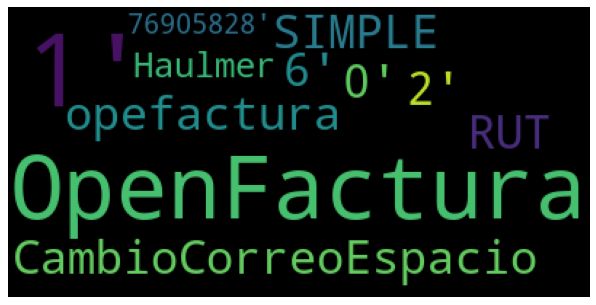

In [100]:
text = df_incidencias['Resumen'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

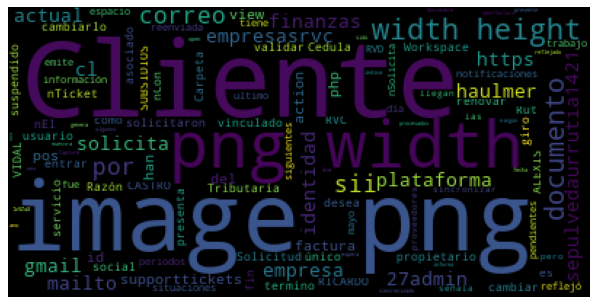

In [101]:
text = df_incidencias['Descripción'].values 
stopwords = set(STOPWORDS)
stopwords.update(["el", "que", "la", "de", "en", "se", "los", "desde", "al", "le", "si", "con", "sin", "su", "para"])
wordcloud = WordCloud(stopwords=stopwords).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [102]:
df_ocurrencias  = df_incidencias["RUT Empresa"].value_counts().rename_axis('RUT').reset_index(name='count_hes')

In [103]:
df_ocurrencias

,RUT,count_hes
0,5213839-6,16
1,76975135-1,16
2,69040700-0,16
3,76540930-6,13
4,76974235-2,12
...,...,...
5309,16040374-9,1
5310,6750600-6,1
5311,18252990-7,1
5312,10691348-k,1


In [104]:
df_consolidados_merge.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito
773,18154912-2,4801980,266,51583,9797,1.50,138,29,0,3,3,3
1951,77282012-7,21100,3,295,56,1.98,144,37,23,2,1,1


In [105]:
df_model = pd.merge(df_consolidados_merge, df_ocurrencias, on = ["RUT"], how= "outer") 

In [106]:
df_model.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,count_hes
3515,13559995-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2689,77567261-7,200.0,1.0,2.0,0.0,1.17,34.0,68.0,0.0,3.0,1.0,0.0,NaN


In [107]:
df_model.shape

(7508, 13)

In [108]:
df_model = df_model[df_model['montoTotal'].notna()]

In [109]:
df_model.shape

(2955, 13)

In [110]:
df_model["has_hes"] = np.where((df_model["count_hes"].isnull()), 0, 1)

In [111]:
df_model.drop(columns = ["count_hes"], inplace = True)

In [112]:
df_model.sample(5)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes
1452,76829853-K,100.0,1.0,1.0,0.0,1.17,93.0,85.0,0.0,3.0,1.0,0.0,0
2177,77425969-4,944750.0,27.0,10767.0,2045.0,1.14,222.0,15.0,0.0,3.0,2.0,0.0,0
2807,8756870-9,1960100.0,187.0,25297.0,4816.0,1.29,147.0,30.0,0.0,3.0,3.0,0.0,0
1009,61607001-0,59443910.0,2940.0,74670.0,14195.0,0.47,221.0,55.0,0.0,3.0,15.0,12.0,0
828,19156631-9,6956270.0,105.0,84395.0,16038.0,1.42,121.0,8.0,0.0,3.0,3.0,1.0,0


----

# Archivo **Planes clientes directos**

In [113]:
df_directos = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Planes clientes directos.xlsx")

In [114]:
df_directos.columns

Index(['EMAIL', 'WHMCS', 'WORKSPACE', 'RUT', 'Plan Tuu', 'ORGANIZACION'], dtype='object')

In [115]:
print("Cantidad de registros : ",df_directos.shape[0])
print("Cantidad de atributos : ",df_directos.shape[1])

Cantidad de registros :  13571
Cantidad de atributos :  6


## Análisis exploratorio y preprocesamiento **Planes clientes directos**

In [116]:
df_directos.sample(3)

,EMAIL,WHMCS,WORKSPACE,RUT,Plan Tuu,ORGANIZACION
7748,fabrizioalmonacid@gmail.com,8134.0,13026.0,180969683.0,Simple,FABRIZIO ANDRES TOLEDO ALMONACID
8282,fsandov@gmail.com,25510.0,13807.0,769897402.0,Simple,VIÑA SANTA ELSA LIMITADA
12510,migueocque@gmail.com,28843.0,10990.0,771719929.0,Openfactura Microempresa,IMPORTADORA


In [117]:
df_directos.shape

(13571, 6)

In [118]:
df_directos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571 entries, 0 to 13570
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EMAIL         13568 non-null  object 
 1   WHMCS         13571 non-null  float64
 2   WORKSPACE     13571 non-null  float64
 3   RUT           13571 non-null  object 
 4   Plan Tuu      13571 non-null  object 
 5   ORGANIZACION  13571 non-null  object 
dtypes: float64(2), object(4)
memory usage: 636.3+ KB


In [119]:
df_directos.RUT = df_directos.RUT.astype(str)

In [120]:
df_directos["RUT"] = df_directos["RUT"].str.replace(".","")

In [121]:
df_directos["RUT"].value_counts()

907528040     2
1690653570    2
7705252250    2
7701773830    2
7713159760    1
             ..
7626244860    1
891650670     1
1208706370    1
951235030     1
7721477400    1
Name: RUT, Length: 13567, dtype: int64

In [122]:
#str1[:(len(str1)-1)]
df_directos["RUT"] = df_directos["RUT"].apply(lambda x : x[:(len(x)-1)] if "K" not in x  else x)

In [123]:
df_directos_aux = df_directos.copy()
df_directos_aux.drop(columns = ["EMAIL", "WHMCS", "WORKSPACE", "ORGANIZACION"], inplace = True)

In [124]:
df_directos_aux.sample(3)

,RUT,Plan Tuu
900,146534414,Simple
3098,764284887,Simple
1677,50033856,Simple


merge c/ df_model

In [125]:
df_model["RUT"] = df_model["RUT"].str.replace("-", "")

In [126]:
df_model_aux = pd.merge(df_model, df_directos_aux, on = ["RUT"]) 

In [127]:
df_model_aux.shape

(2537, 14)

In [128]:
df_model_aux.rename(columns={"Plan Tuu":"planTUU"}, inplace = True)

In [129]:
df_model_aux["planTUU"] = df_model_aux[["planTUU"]].apply(lencoder.fit_transform)

In [130]:
df_model = df_model_aux.copy()

----

# Archivo **Servicios Haulmer**

In [131]:
df_sshaulmer = pd.read_excel("/content/drive/MyDrive/Proyecto Innovación 1/Metodología/Datos/Servicios Haulmer (churn).xlsx")

In [132]:
df_sshaulmer.columns

Index(['Usuario', 'Servicio', 'Partner', 'Empresa', 'Categoria', 'Producto',
       'Monto Servicio', 'Registro', 'Periodo Registro', 'PeriodoTérmino',
       'Estado', 'Pagadas', 'Sin Pagar'],
      dtype='object')

In [133]:
print("Cantidad de registros : ",df_sshaulmer.shape[0])
print("Cantidad de atributos : ",df_sshaulmer.shape[1])

Cantidad de registros :  22129
Cantidad de atributos :  13


## Análisis exploratorio y preprocesamiento **Servicios Haulmer**

In [134]:
df_sshaulmer.sample(3)

,Usuario,Servicio,Partner,Empresa,Categoria,Producto,Monto Servicio,Registro,Periodo Registro,PeriodoTérmino,Estado,Pagadas,Sin Pagar
3504,15118.0,26081.0,NaN,Haulmer,OpenFactura,OpenFactura Microempresa,120000.0,2020-05-28,2020-05-01,2022-06-01 00:00:00,Active,2.0,1.0
17273,36102.0,80632.0,NaN,Haulmer,OpenFactura,Partner | OpenFactura Gran empresa,149999.0,2021-08-24,2021-08-01,2021-10-01 00:00:00,Terminated,1.0,0.0
3841,15885.0,27604.0,NaN,Haulmer,Simple,Simple,60000.0,2020-07-29,2020-07-01,2022-09-01 00:00:00,Active,4.0,0.0


In [135]:
df_sshaulmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22129 entries, 0 to 22128
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Usuario           22129 non-null  float64       
 1   Servicio          22129 non-null  float64       
 2   Partner           7 non-null      object        
 3   Empresa           22129 non-null  object        
 4   Categoria         22129 non-null  object        
 5   Producto          22129 non-null  object        
 6   Monto Servicio    22129 non-null  float64       
 7   Registro          22129 non-null  datetime64[ns]
 8   Periodo Registro  22129 non-null  datetime64[ns]
 9   PeriodoTérmino    22129 non-null  object        
 10  Estado            22129 non-null  object        
 11  Pagadas           22129 non-null  float64       
 12  Sin Pagar         22129 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 2.2+ MB


----

# **Archivo para análisis**

In [136]:
df_model.sample(2)

,RUT,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,planTUU
2060,774917780,7635060.0,834.0,101728.0,19342.0,1.72,173.0,66.0,0.0,3.0,5.0,4.0,1,2
468,157255797,508570.0,36.0,6562.0,1243.0,1.29,110.0,74.0,0.0,3.0,2.0,0.0,0,2


In [137]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 0 to 2536
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RUT                    2537 non-null   object 
 1   montoTotal             2537 non-null   float64
 2   cantidadTransacciones  2537 non-null   float64
 3   comisionNeta           2537 non-null   float64
 4   comisionIVA            2537 non-null   float64
 5   porcentajeComision     2537 non-null   float64
 6   codSII                 2537 non-null   float64
 7   MCC                    2537 non-null   float64
 8   Partner                2537 non-null   float64
 9   categoriaPartner       2537 non-null   float64
 10  debito                 2537 non-null   float64
 11  credito                2537 non-null   float64
 12  has_hes                2537 non-null   int64  
 13  planTUU                2537 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 297.3+

In [138]:
df_model.describe()

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,planTUU
count,2.537000e+03,2537.000000,2.537000e+03,2.537000e+03,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,8.603870e+06,771.487584,1.157201e+05,2.199409e+04,1.593268,128.464328,51.549468,0.011037,3.000394,3.460780,2.469846,0.262909,2.034292
std,2.074012e+07,1677.415497,2.895128e+05,5.502245e+04,0.278042,52.957385,24.430840,0.555901,0.019854,2.343219,2.380913,0.440300,0.238304
min,1.000000e+02,1.000000,0.000000e+00,0.000000e+00,0.130000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,4.656000e+05,32.000000,6.154000e+03,1.168000e+03,1.420000,110.000000,37.000000,0.000000,3.000000,2.000000,1.000000,0.000000,2.000000
50%,2.475410e+06,192.000000,3.232500e+04,6.128000e+03,1.680000,118.000000,57.000000,0.000000,3.000000,3.000000,2.000000,0.000000,2.000000
75%,8.045600e+06,749.000000,1.049740e+05,1.994300e+04,1.800000,172.000000,74.000000,0.000000,3.000000,5.000000,4.000000,1.000000,2.000000
max,3.653484e+08,24262.000000,5.802891e+06,1.102355e+06,2.510000,248.000000,86.000000,28.000000,4.000000,30.000000,30.000000,1.000000,4.000000


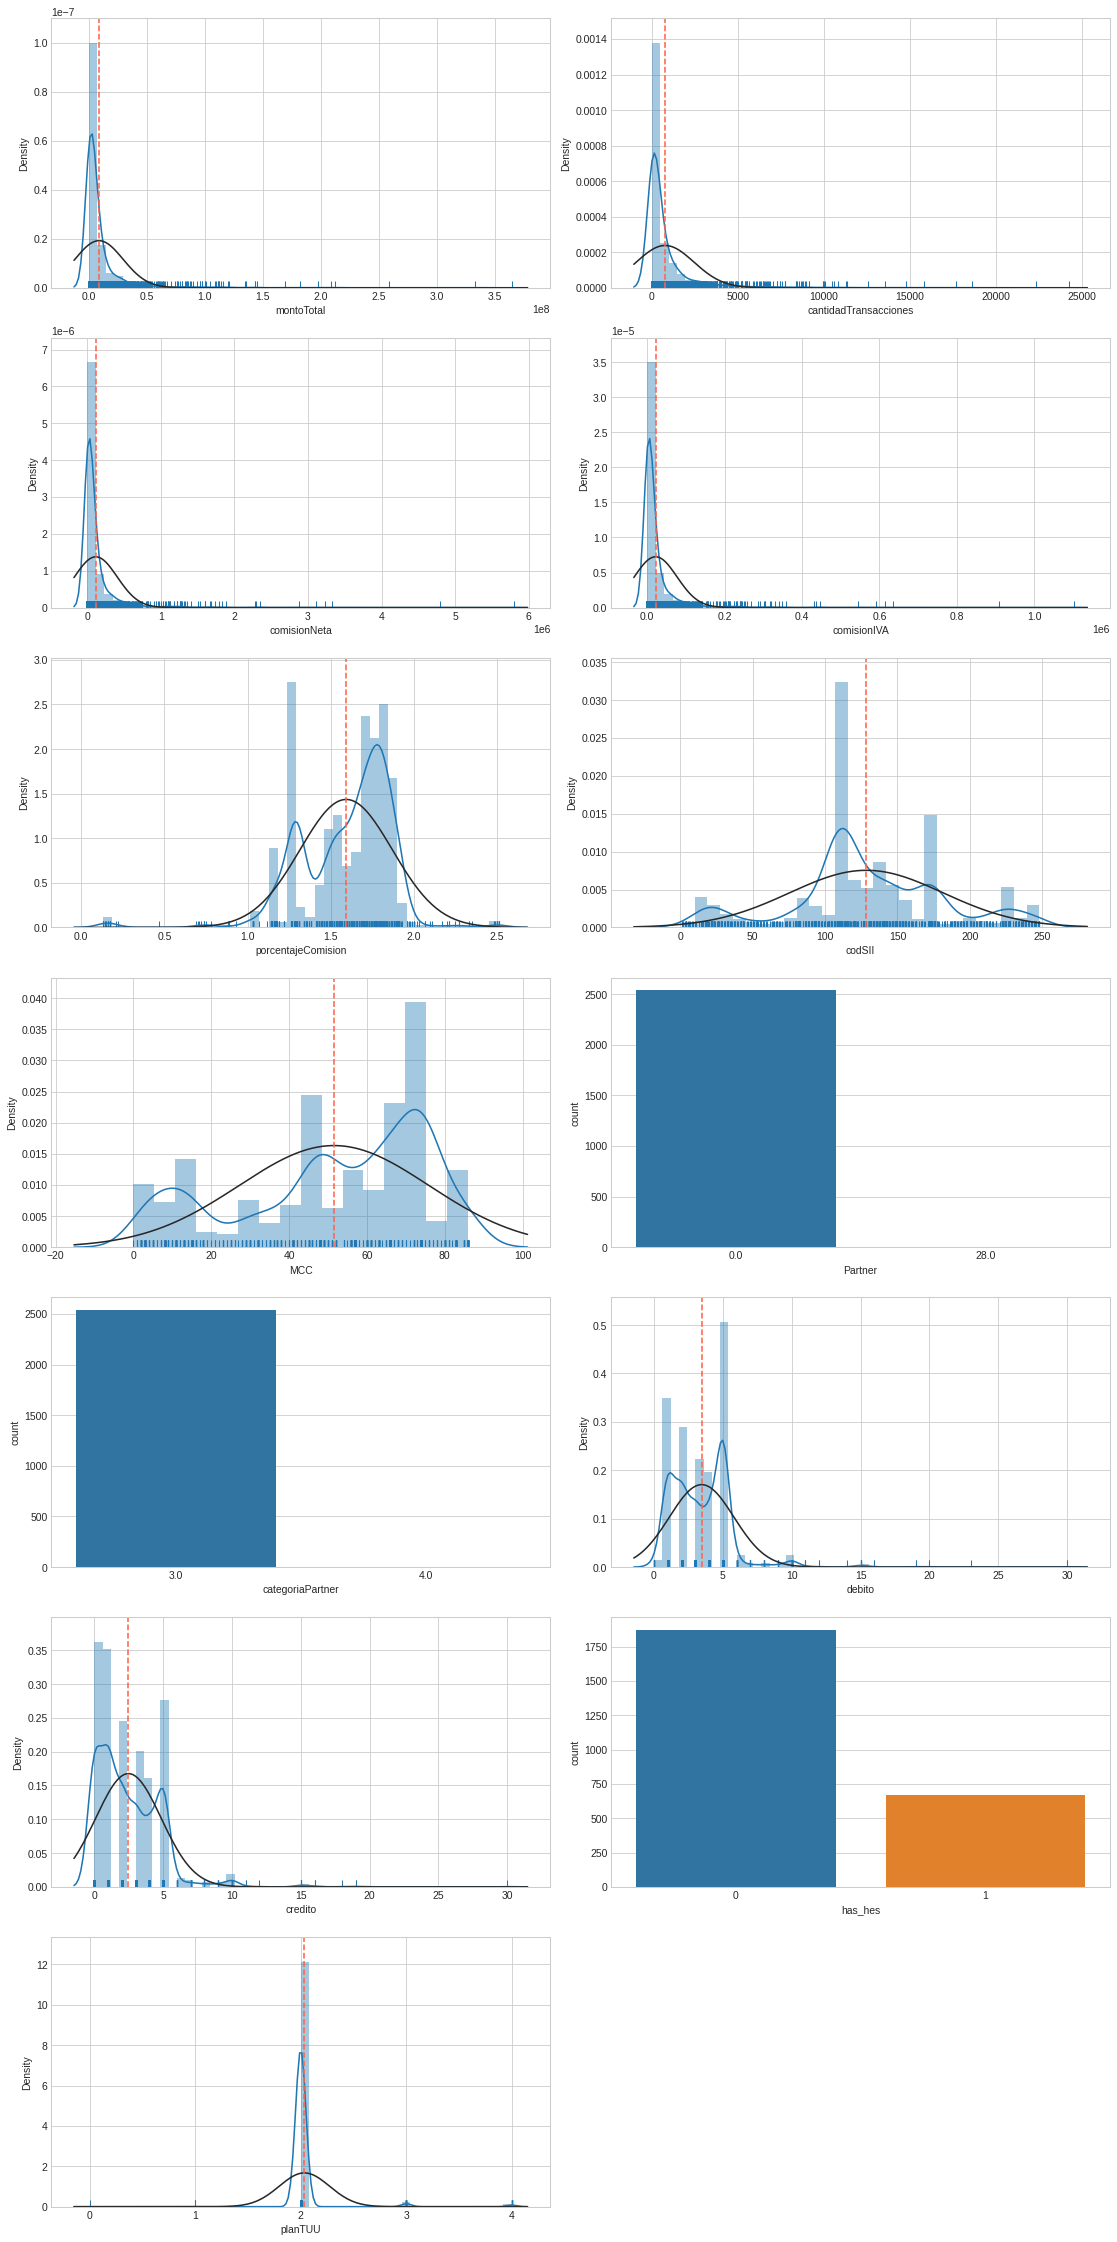

In [140]:
rows = 7; cols = round(df_model.drop(columns="RUT").shape[1]/rows)
plt.figure(figsize=(15,30))
for i,j in enumerate(df_model.drop(columns="RUT").columns):
    plt.subplot(rows, cols, i+1)
    if df_model[j].dtype == 'object':
        sns.countplot(df_model[j])
        plt.xticks(rotation=45)
    else:
        if len(df_model[j].value_counts())>2:
            sns.distplot(df_model[j],rug=True,fit=stats.norm)    
            plt.axvline(df_model[j].mean(), color = "tomato", linestyle = '--')
        else:
            sns.countplot(df_model[j])
    plt.tight_layout()

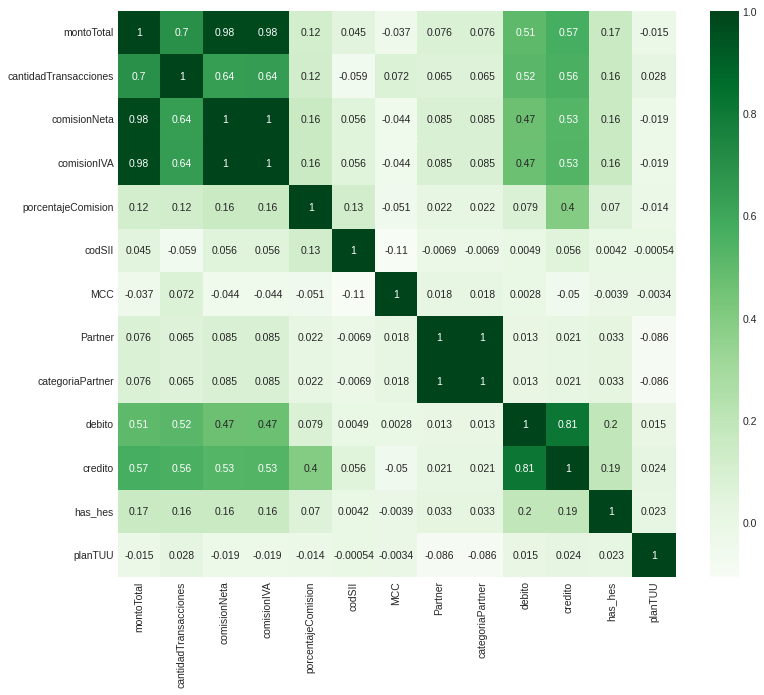

In [142]:
# Se revisa la correlación entre las variables
plt.figure(figsize=(12,10))
sns.heatmap(df_model.corr(), cmap='Greens', annot=True);

#### StandardScaler - Puntaje Z

$$
Z = \frac{x - μ}{σ}
$$

con media : 

$$
\mu = \frac{1}{N}∑(x_i)
$$

y desviación estándar :

$$
σ = \sqrt{\frac{1}{N}∑(x_i - \mu)^2}
$$


In [ ]:
num_cols = list(df_model.drop(columns = "RUT").columns)
df_std = pd.DataFrame(StandardScaler().fit_transform(df_model[num_cols].astype('float64')),columns=num_cols)

## KMEANS 

In [ ]:
df_std

,montoTotal,cantidadTransacciones,comisionNeta,comisionIVA,porcentajeComision,codSII,MCC,Partner,categoriaPartner,debito,credito,has_hes,planTUU
0,-0.404845,-0.455247,-0.390468,-0.390483,-1.090939,0.255646,-1.987612,-0.019858,-0.019858,-1.050378,-1.037557,-0.597231,-0.14393
1,-0.414909,-0.458824,-0.399771,-0.399790,-1.090939,-0.329846,-1.578213,-0.019858,-0.019858,-1.050378,-1.037557,-0.597231,-0.14393
2,-0.196656,-0.353880,-0.207089,-0.207358,0.132137,-1.991887,-0.145315,-0.019858,-0.019858,0.657012,0.642802,-0.597231,-0.14393
3,-0.370214,-0.406949,-0.353716,-0.353709,1.103403,-0.367619,1.410403,-0.019858,-0.019858,-0.623531,-0.197378,-0.597231,-0.14393
4,0.175163,0.986541,0.154735,0.154075,0.779648,-0.235412,-1.660093,-0.019858,-0.019858,1.937555,1.482981,-0.597231,-0.14393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,0.157698,0.907236,0.131236,0.131462,0.312001,-0.348733,0.919123,-0.019858,-0.019858,0.657012,0.222712,1.674395,-0.14393
2533,0.129903,0.251933,0.087695,0.087743,0.347974,0.482288,-0.145315,-0.019858,-0.019858,-0.196683,0.222712,-0.597231,-0.14393
2534,-0.353669,-0.152937,-0.353384,-0.352855,-0.335510,-0.273185,0.223144,-0.019858,-0.019858,0.657012,1.062892,-0.597231,-0.14393
2535,0.924960,0.040852,0.705441,0.704995,-0.515374,-2.086321,0.223144,-0.019858,-0.019858,0.657012,0.642802,1.674395,-0.14393


In [ ]:
X = df_std

Elbow Method to determine the number of clusters to be formed:


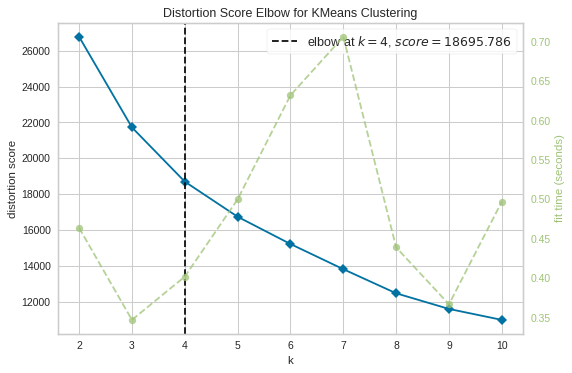

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Elbow
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=1234), k=10)
Elbow_M.fit(X)
Elbow_M.show()

Text(0, 0.5, 'Inertia')

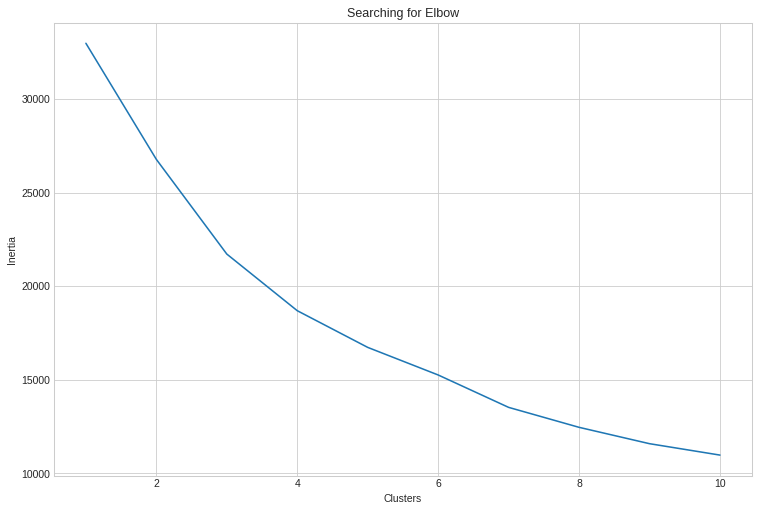

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

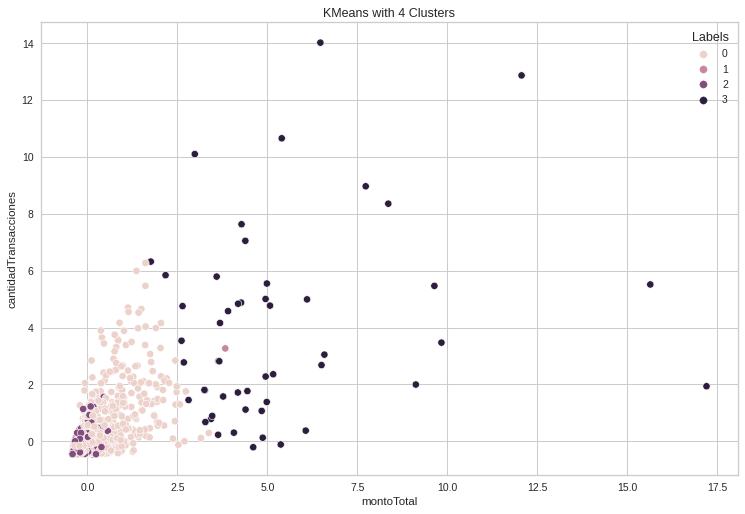

In [ ]:
km_model_4 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km_model_4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['montoTotal'], X['cantidadTransacciones'], hue=X['Labels'])
plt.title('KMeans with 4 Clusters')
plt.show()